# What is A/B testing

A/B testing (also known as split testing or bucket testing) is a method of comparing two versions of a webpage or app against each other to determine which one performs better. AB testing is essentially an experiment where two or more variants of a page are shown to users at random, and statistical analysis is used to determine which variation performs better for a given conversion goal.

https://www.optimizely.com/optimization-glossary/ab-testing/

https://cran.r-project.org/web/packages/bayesAB/vignettes/introduction.html

### Install packages

In [1]:
install.packages(c("bayesAB", "pwr"))

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


### Load libraries

In [2]:
library(bayesAB)
library(pwr)

### A/B Test 
__In this scenario, we suppose the traffic of download of mobile Application of `version-A` and `version-B` are `500` and `550` respectively out of 1000 people. We have to check which version of has more traffic rate to download__

In [3]:
ab_test <- prop.test(c(500, 545), c(1000, 1000))

ab_test


	2-sample test for equality of proportions with continuity correction

data:  c(500, 545) out of c(1000, 1000)
X-squared = 3.8799, df = 1, p-value = 0.04887
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.0897372891 -0.0002627109
sample estimates:
prop 1 prop 2 
 0.500  0.545 


### A/B test comes with a lot of information, you can see by using below `names` function.

In [4]:
names(ab_test)

[1] "statistic"   "parameter"   "p.value"     "estimate"    "null.value" 
[6] "conf.int"    "alternative" "method"      "data.name"

In [5]:
ab_test$statistic

X-squared 
 3.879857

In [6]:
ab_test$p.value

[1] 0.04886873

### Prior probability of `version-A` and `version-B` respectively

In [7]:
prior_prob_A <- ab_test$estimate[1]

prior_prob_B <- ab_test$estimate[2]

In [8]:
prior_prob_A
prior_prob_B

prop 1 
   0.5

prop 2 
 0.545

### Bayesian A/B Test

Bayesian statistics in A/B testing is mainly based on past or prior knowledge of similar experiment and the present data. The past knowledge is known as prior also prior probability distribution is combined with current experiment data to make a conclusion on the test at hand.

https://stepupanalytics.com/ab-testing-with-r/

### Binomial distribuation on the basis of `prior probability` and `size` which is combine with prior probability.

In [9]:
A_traffic <- rbinom(1000, 1, prior_prob_A)
B_traffic <- rbinom(1000, 1, prior_prob_B)

### Count binomial distribution and show barplot

In [10]:
A <- c(A_traffic)
B <- c(B_traffic)

In [11]:
df <- data.frame(A, B)

head(df)

A,B
1,0
0,0
0,1
1,1
1,1
1,0


In [12]:
table(df$A)


  0   1 
483 517 

In [13]:
table(df$B)


  0   1 
485 515 

In [14]:
library(ggplot2)

In [15]:
options(repr.plot.width = 10, repr.plot.height = 6)

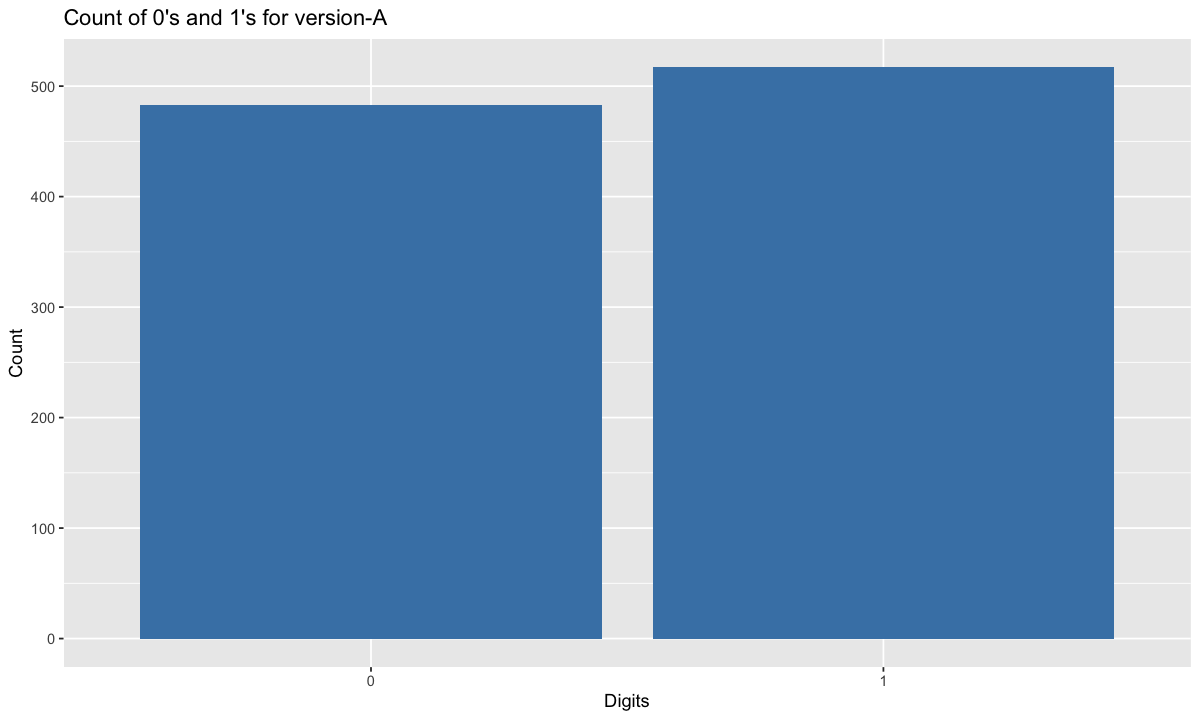

In [16]:
ggplot(data = df, 
       aes(factor(x = A), fill = I('steelblue'))) + 
       geom_bar() +
       ggtitle("Count of 0's and 1's for version-A")+
       xlab('Digits') +
       ylab('Count') 

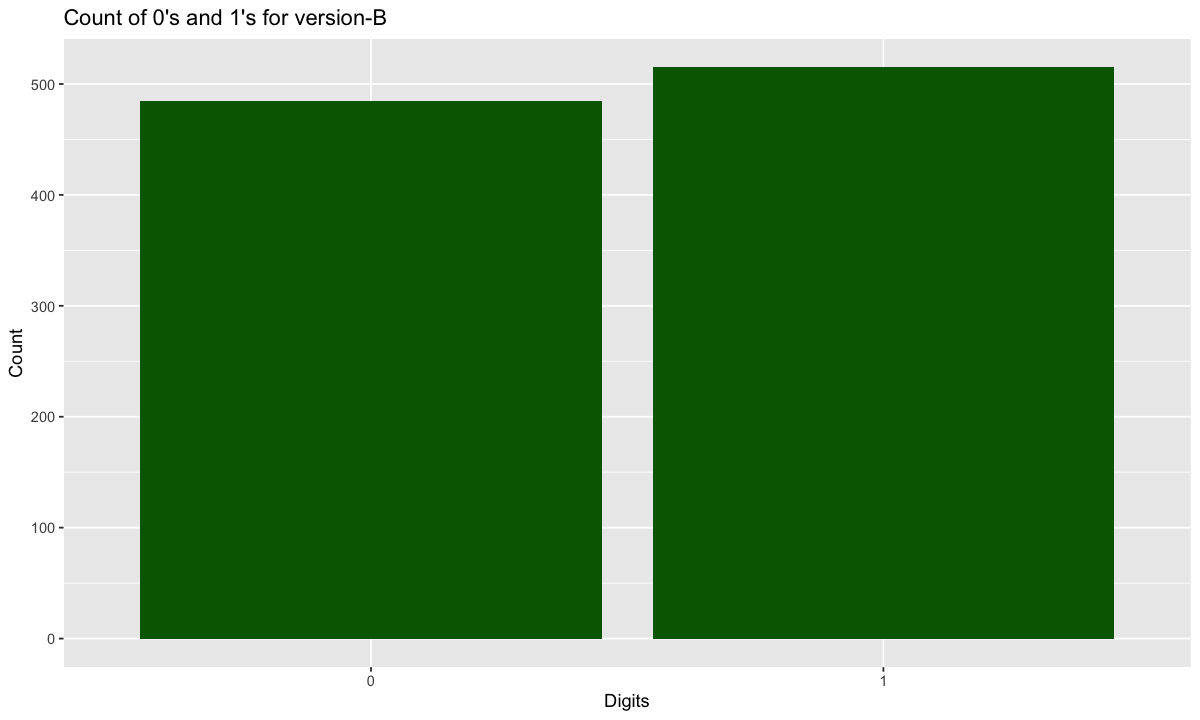

In [17]:
ggplot(data = df, 
       aes(factor(x = B), fill = I('darkgreen'))) + 
       geom_bar() +
       ggtitle("Count of 0's and 1's for version-B")+
       xlab('Digits') +
       ylab('Count')

## Bernoulli

Here we will do bayes test using Bernoulli distribution

### Apply `bayesTest` for Bayesian A/B Test with alpha = 10, and beta = 20 or (i.e  with beta probability density function for parameters: alpha = 10, beta = 20)
https://cran.r-project.org/web/packages/bayesAB/vignettes/introduction.html

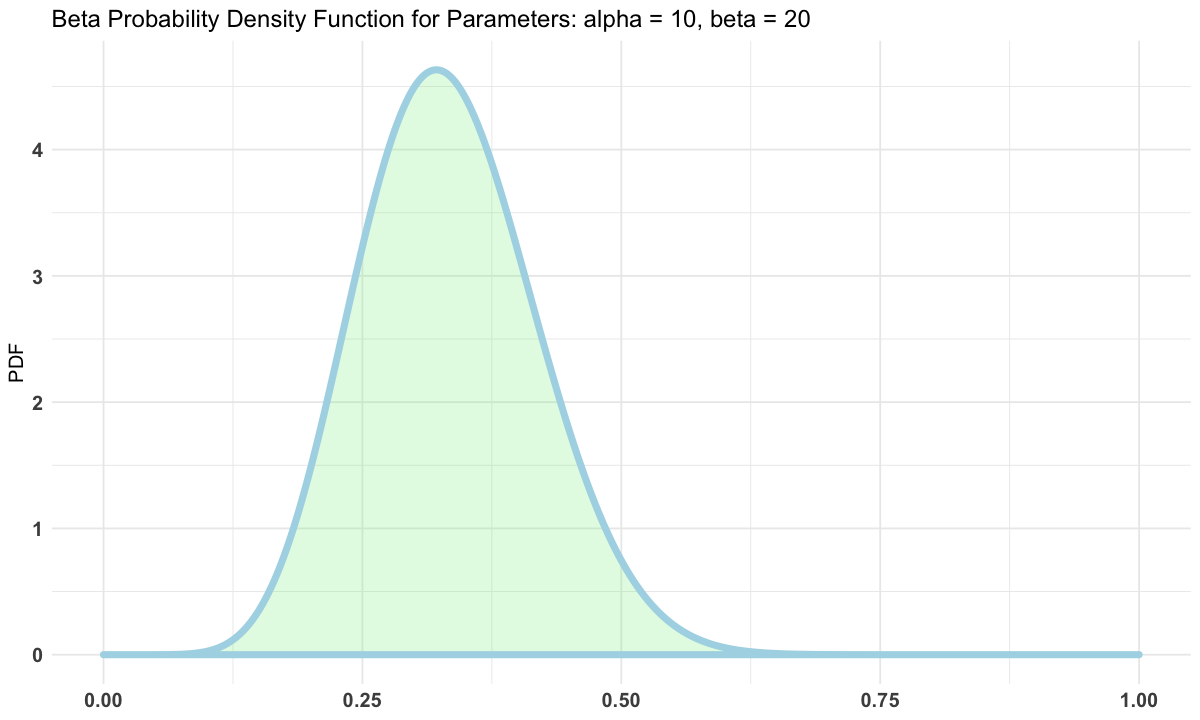

In [18]:
plotBeta(10, 20)

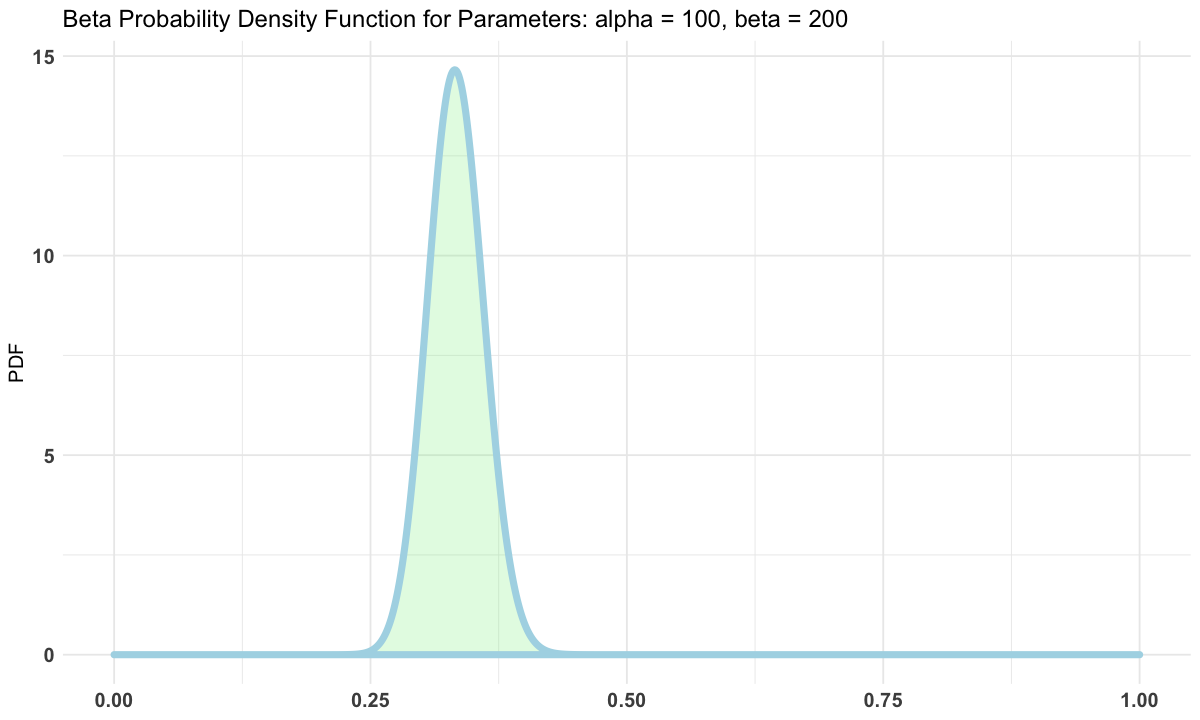

In [19]:
plotBeta(100, 200)

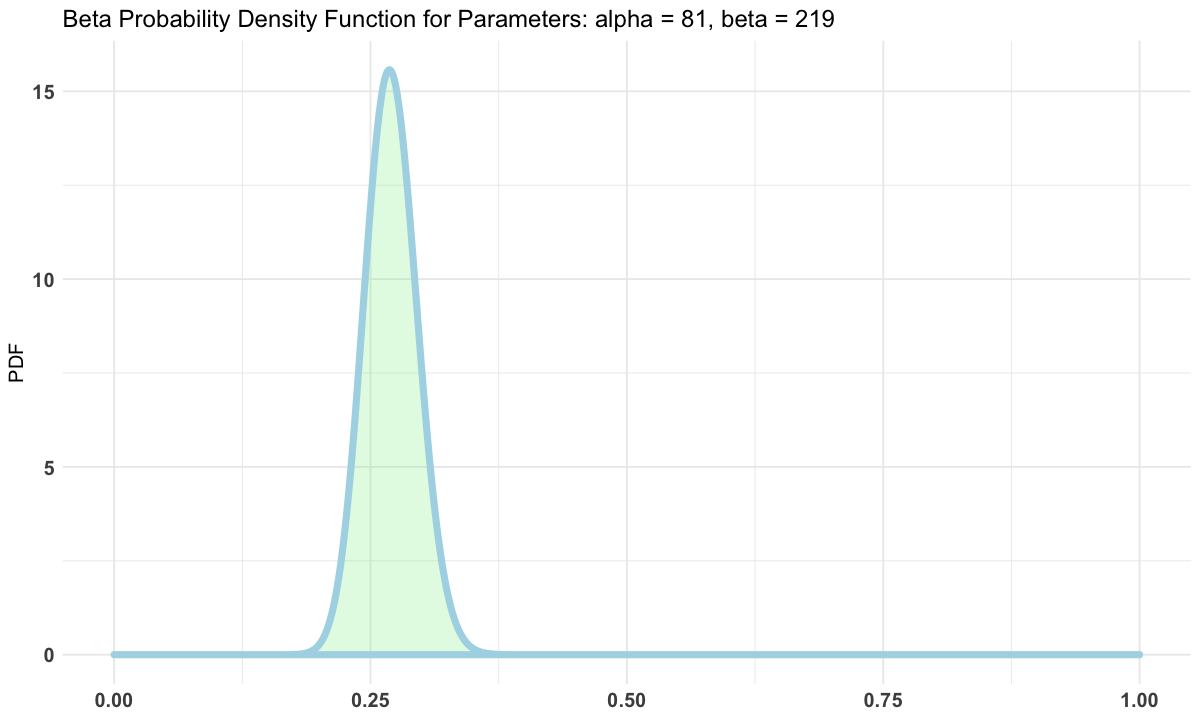

In [20]:
plotBeta(81, 219)

In [30]:
AB1 <- bayesTest(A_traffic,
                 B_traffic,
                 n_samples = 1e3,
                 priors = c('alpha' = 81, 'beta' = 219),
                 distribution = 'bernoulli')

__Note:-__ `bayestest()` comes with couple of `print`, `plot` and `summary`.

__`Print` function dealing with input variables__

In [31]:
print(AB1)

--------------------------------------------
Distribution used: bernoulli 
--------------------------------------------
Using data with the following properties: 
            A     B
Min.    0.000 0.000
1st Qu. 0.000 0.000
Median  1.000 1.000
Mean    0.517 0.515
3rd Qu. 1.000 1.000
Max.    1.000 1.000
--------------------------------------------
Conjugate Prior Distribution: Beta 
Conjugate Prior Parameters: 
$alpha
[1] 81

$beta
[1] 219

--------------------------------------------
Calculated posteriors for the following parameters: 
Probability 
--------------------------------------------
Monte Carlo samples generated per posterior: 
[1] 1000


__`Summary` function gives us credible interval on `(A - B) / B`.__

In [32]:
summary(AB1)

Quantiles of posteriors for A and B:

$Probability
$Probability$A
       0%       25%       50%       75%      100% 
0.4061558 0.4500514 0.4598877 0.4692182 0.5029996 

$Probability$B
       0%       25%       50%       75%      100% 
0.4061353 0.4487174 0.4580954 0.4672222 0.5073871 


--------------------------------------------

P(A > B) by (0)%: 

$Probability
[1] 0.548

--------------------------------------------

Credible Interval on (A - B) / B for interval length(s) (0.9) : 

$Probability
         5%         95% 
-0.06736258  0.07678950 

--------------------------------------------

Posterior Expected Loss for choosing B over A:

$Probability
[1] 0.01602886


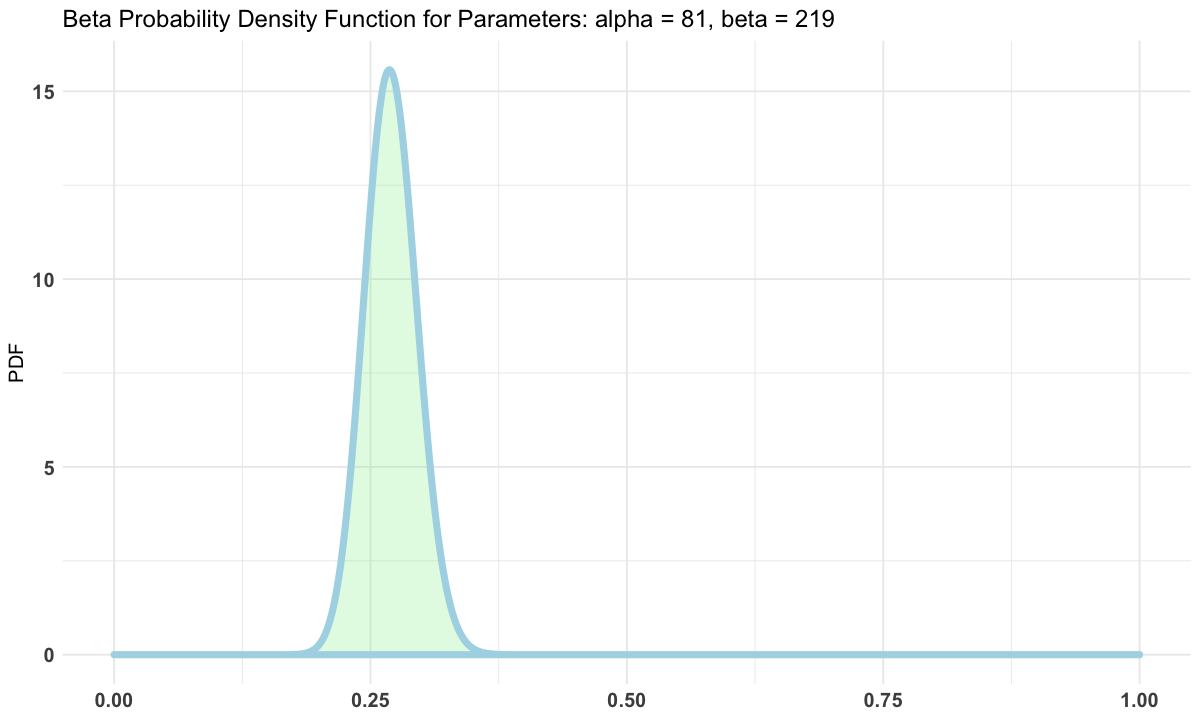

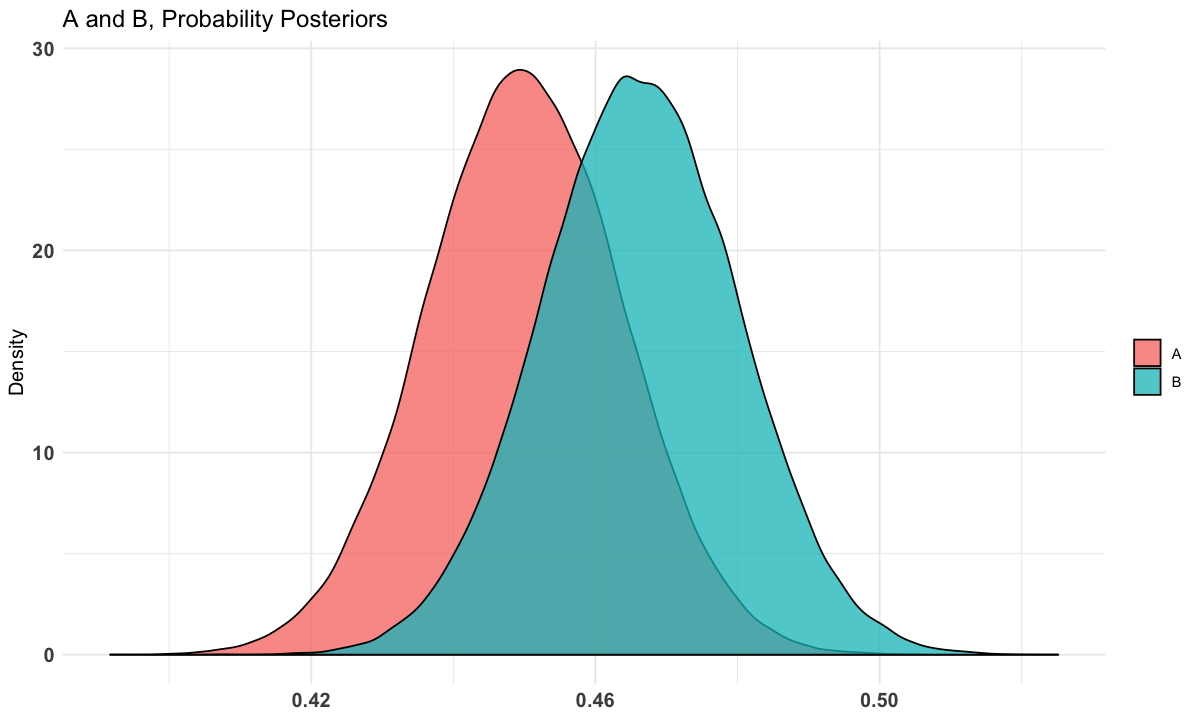

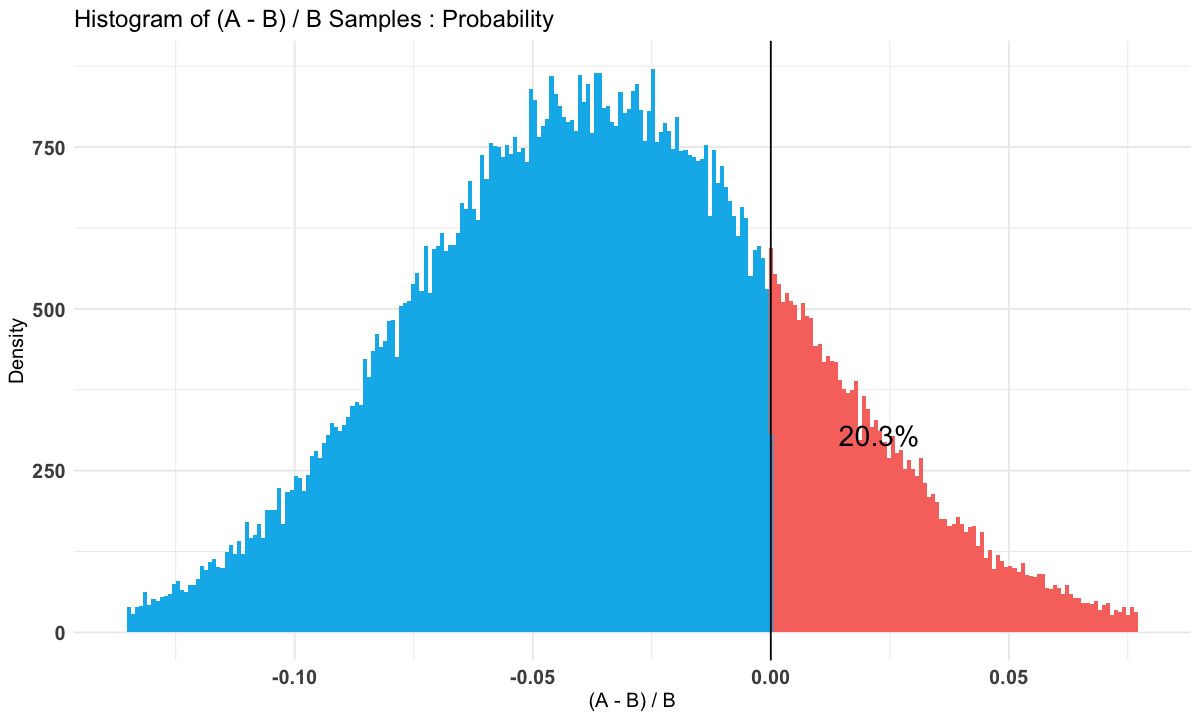

In [199]:
plot(AB1)

In [204]:
AB2 <- bayesTest(A_traffic,
                 B_traffic,
                 priors = c('alpha' = 10, 'beta' = 20),
                 distribution = 'bernoulli')

In [205]:
print(AB2)

--------------------------------------------
Distribution used: bernoulli 
--------------------------------------------
Using data with the following properties: 
            A     B
Min.    0.000 0.000
1st Qu. 0.000 0.000
Median  1.000 1.000
Mean    0.504 0.525
3rd Qu. 1.000 1.000
Max.    1.000 1.000
--------------------------------------------
Conjugate Prior Distribution: Beta 
Conjugate Prior Parameters: 
$alpha
[1] 10

$beta
[1] 20

--------------------------------------------
Calculated posteriors for the following parameters: 
Probability 
--------------------------------------------
Monte Carlo samples generated per posterior: 
[1] 1e+05


In [206]:
summary(AB2)

Quantiles of posteriors for A and B:

$Probability
$Probability$A
       0%       25%       50%       75%      100% 
0.4267045 0.4884745 0.4989881 0.5095653 0.5623299 

$Probability$B
       0%       25%       50%       75%      100% 
0.4412859 0.5088156 0.5193070 0.5299187 0.5836408 


--------------------------------------------

P(A > B) by (0)%: 

$Probability
[1] 0.17961

--------------------------------------------

Credible Interval on (A - B) / B for interval length(s) (0.9) : 

$Probability
         5%         95% 
-0.10500741  0.03166275 

--------------------------------------------

Posterior Expected Loss for choosing B over A:

$Probability
[1] 0.04583196


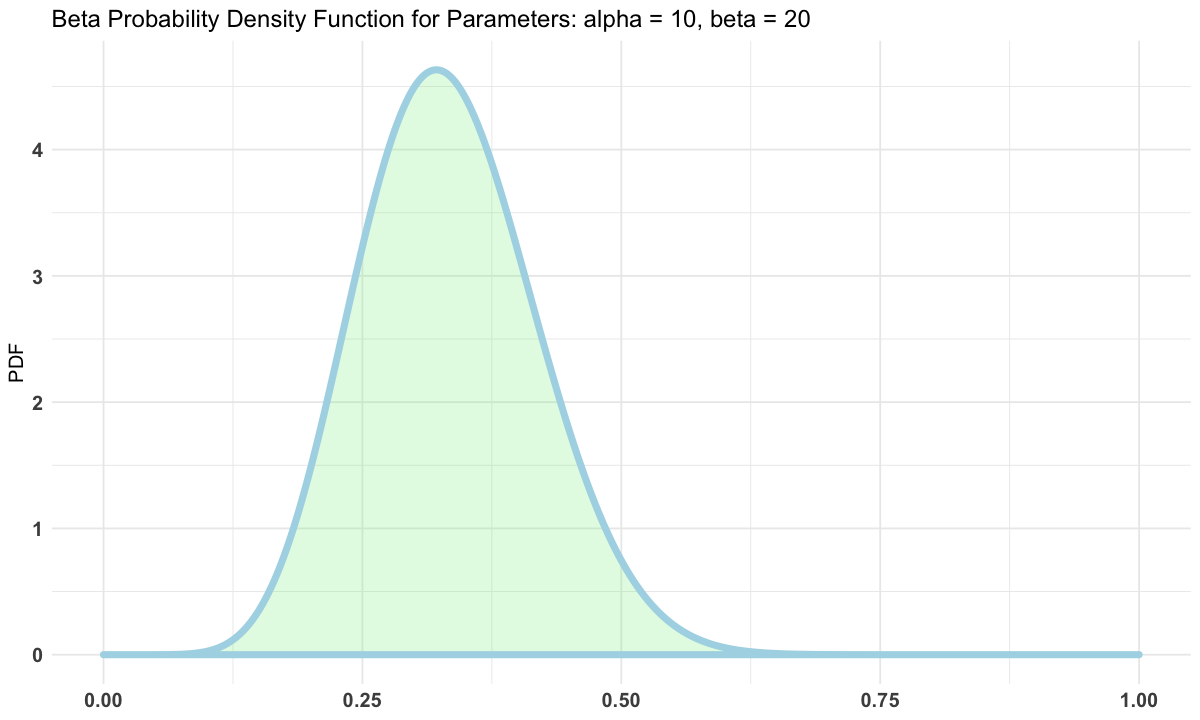

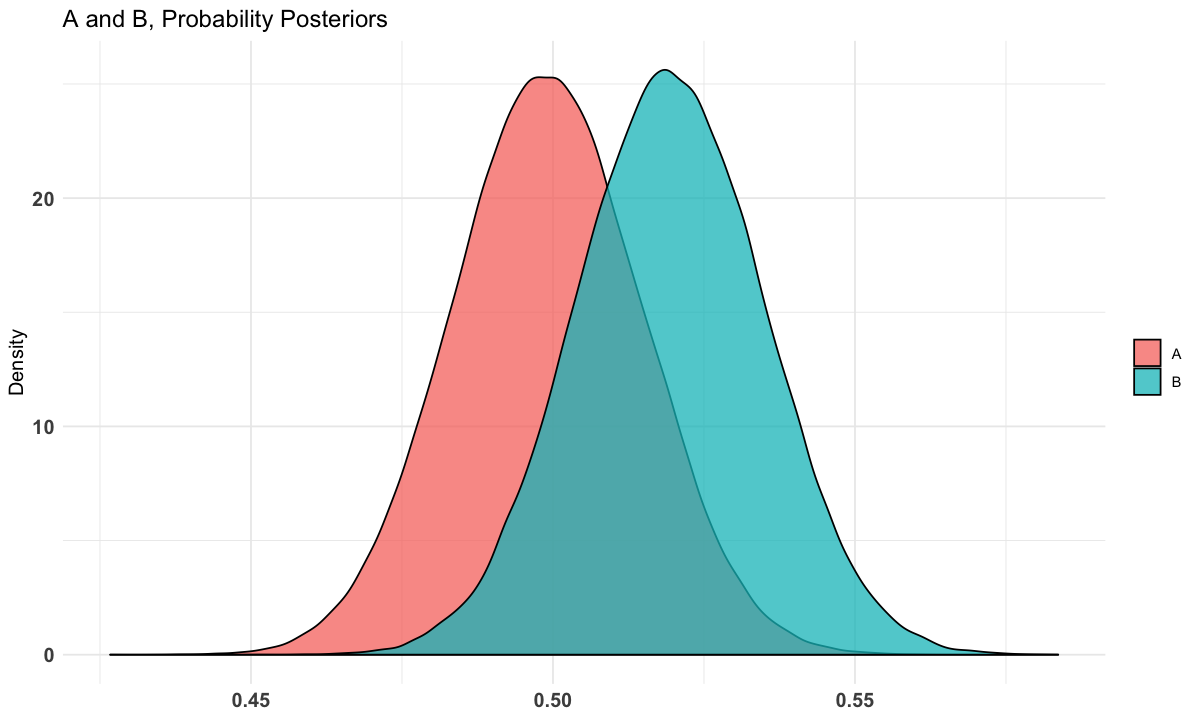

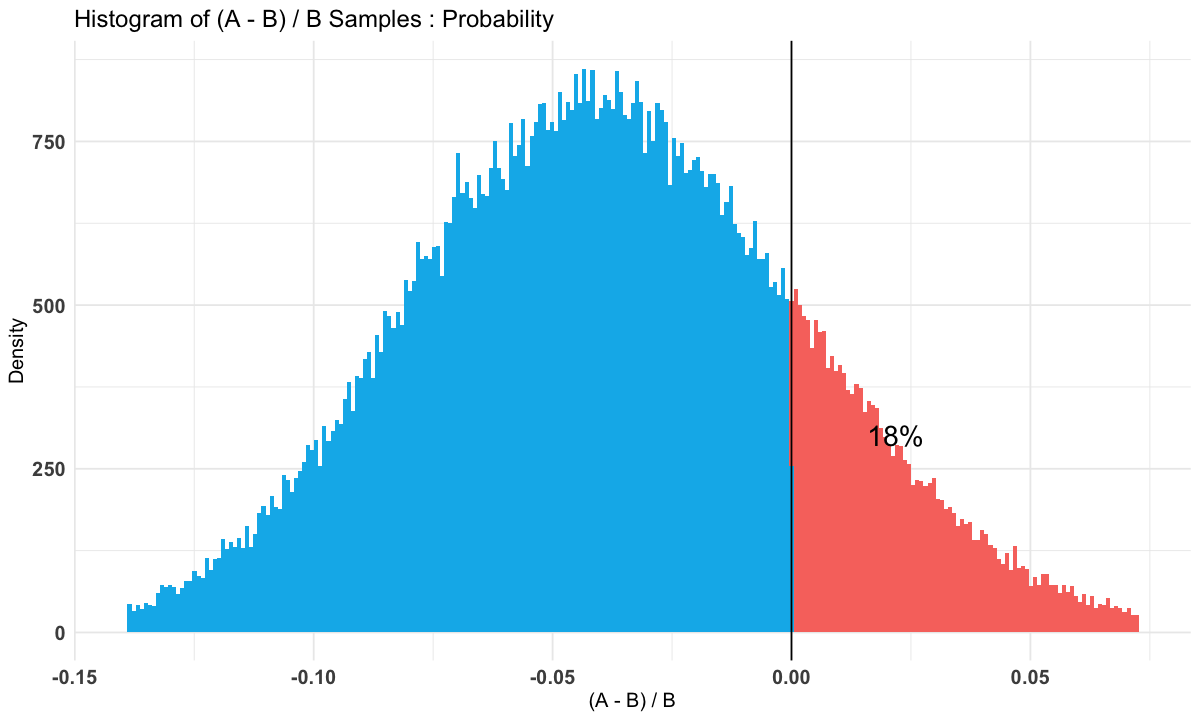

In [207]:
plot(AB2)

In [164]:
A_pois <- rpois(500, 6.3)
B_pois <- rpois(500, 6.1)

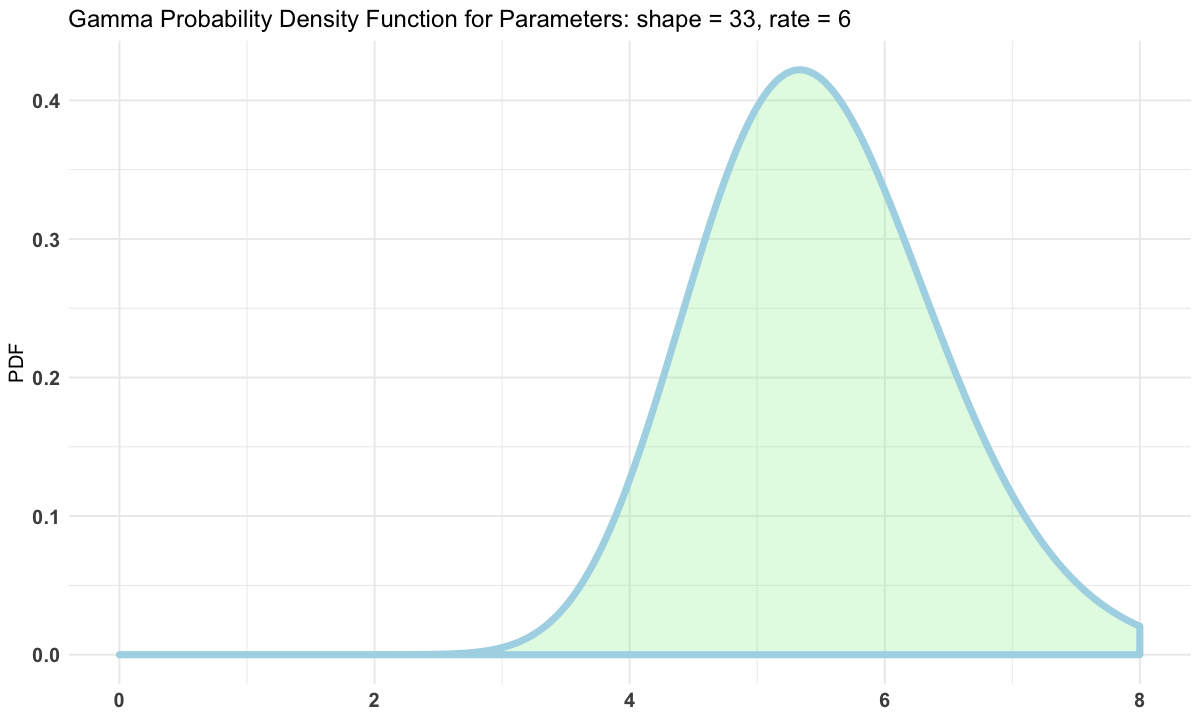

In [165]:
plotGamma(33, 6)

In [166]:
AB2 <- bayesTest(A_pois, B_pois, 
                 priors = c('shape' = 33, 'rate' = 6), 
                 n_samples = 1e5, 
                 distribution = 'poisson')

In [167]:
print(AB2)

--------------------------------------------
Distribution used: poisson 
--------------------------------------------
Using data with the following properties: 
             A      B
Min.     0.000  0.000
1st Qu.  4.000  5.000
Median   6.000  6.000
Mean     6.234  6.052
3rd Qu.  8.000  8.000
Max.    14.000 15.000
--------------------------------------------
Conjugate Prior Distribution: Gamma 
Conjugate Prior Parameters: 
$shape
[1] 33

$rate
[1] 6

--------------------------------------------
Calculated posteriors for the following parameters: 
Lambda 
--------------------------------------------
Monte Carlo samples generated per posterior: 
[1] 1e+05


In [168]:
summary(AB2)

Quantiles of posteriors for A and B:

$Lambda
$Lambda$A
      0%      25%      50%      75%     100% 
5.688459 6.149943 6.224772 6.299790 6.701007 

$Lambda$B
      0%      25%      50%      75%     100% 
5.561558 5.972056 6.044622 6.118250 6.571026 


--------------------------------------------

P(A > B) by (0)%: 

$Lambda
[1] 0.87659

--------------------------------------------

Credible Interval on (A - B) / B for interval length(s) (0.9) : 

$Lambda
         5%         95% 
-0.01254809  0.07344867 

--------------------------------------------

Posterior Expected Loss for choosing B over A:

$Lambda
[1] 0.001588391


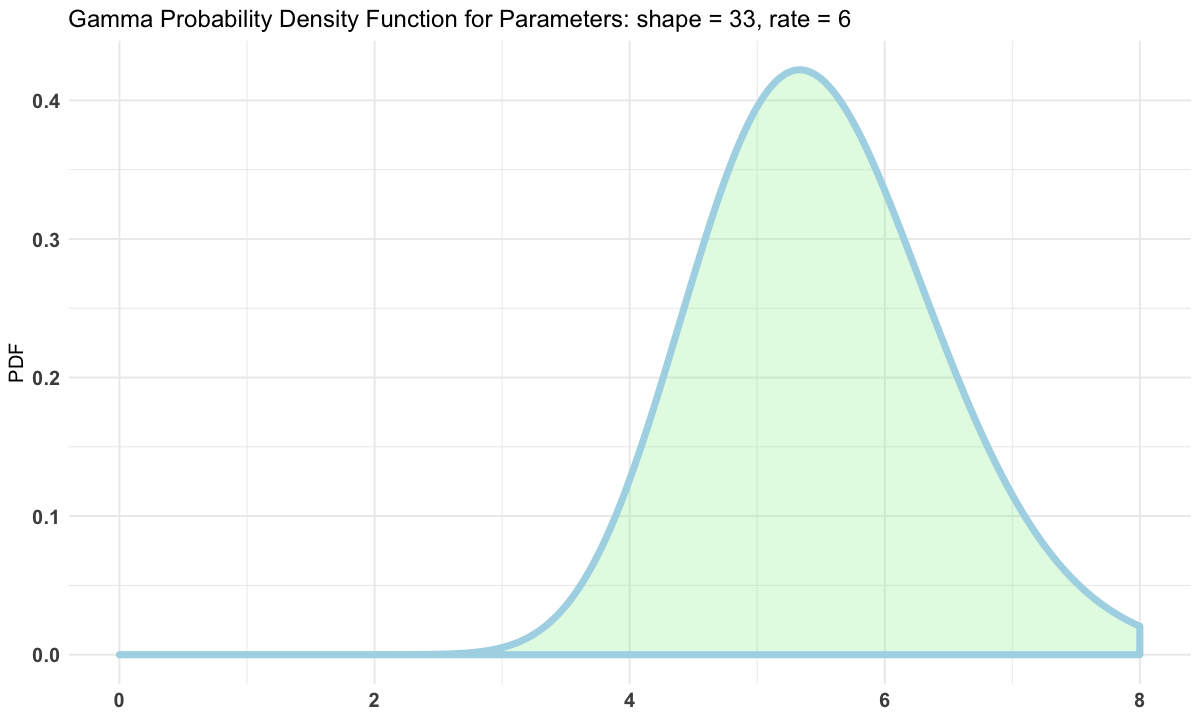

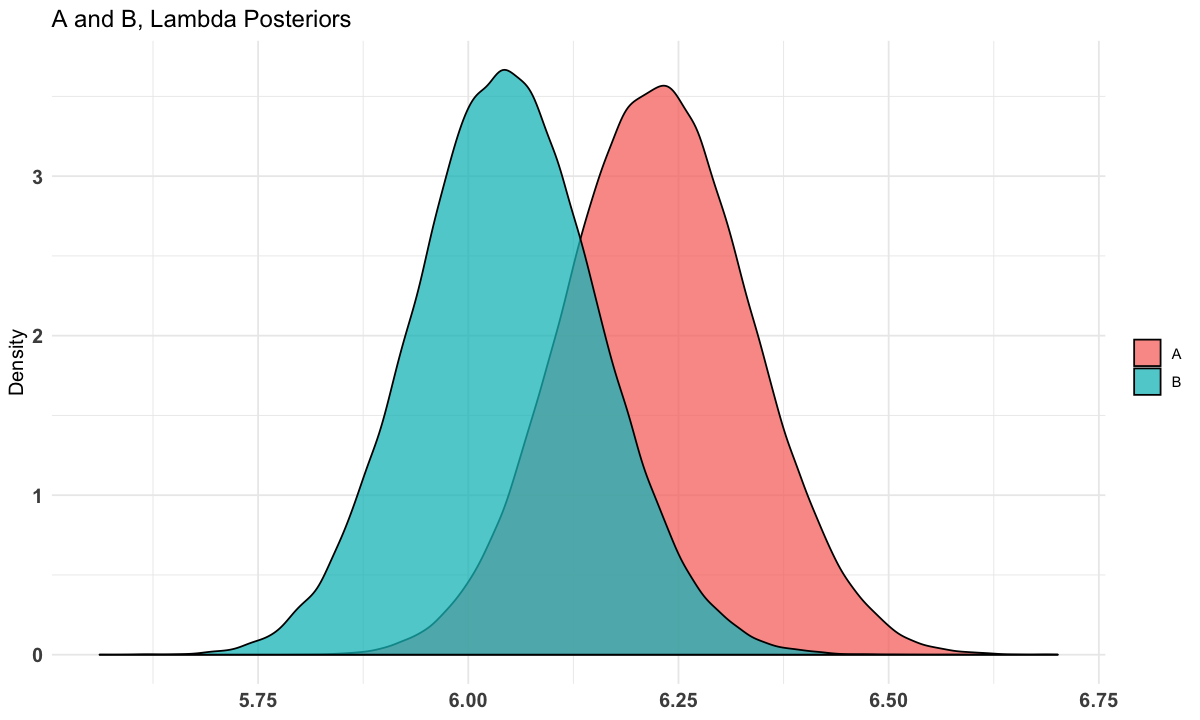

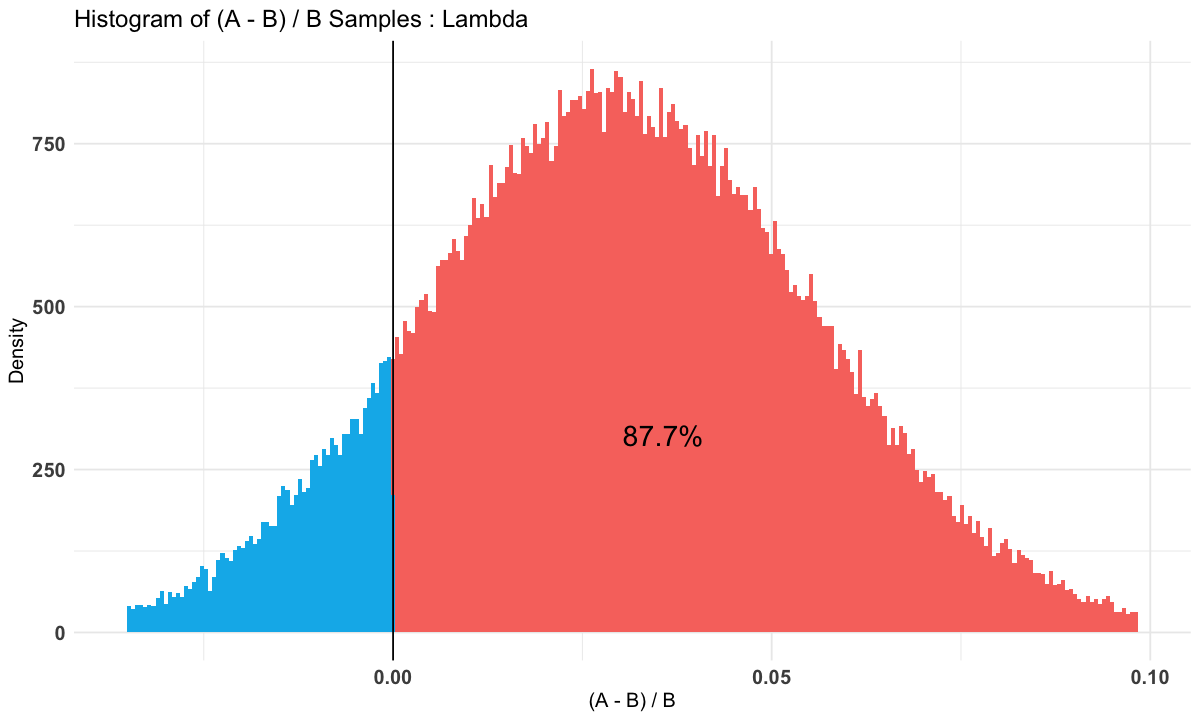

In [169]:
plot(AB2)